<center><font size="+4">Introduction to Programming and Machine Learning in Python 2020/2021</font></center>
<center><font size="+2">Scuola Normale Superiore, Pisa, Italy</font></center>

<center><font size="+2">Course responsibles</font></center>
<center><font size="+2">Andrea Vandin a.vandin@santannapisa.it</font></center>
<center><font size="+2">Daniele Licari d.licari@santannapisa.it</font></center>

---

<center><font size="+4">Lecture 5: </font></center>
<center><font size="+2"> Creation of word clouds for COVID-related online news</font></center>
</center>

---

# Computing and visulatizing the most important words in online news

This example shows that functions can hide a lot of complexity.
* E.g., we can download remote data by just invoking a function
* In particular, in this example we will:
    1.	Download all the articles the online service [NewsAPI](https://newsapi.org/)
    2.	Combine the articles in one data
    3.	Clean data
    4.	Compute word-frequency pairs
    5.	Visualize the analysis in a Word Cloud
    
 

This document has been __created by Daniele Licari__ and elaborated by Andrea Vandin.

## The modules we need to use

In [5]:
import sys
!"{sys.executable}" -m pip install newsapi-python
!"{sys.executable}" -m pip install wordcloud

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
# integrating News API into your Python application 
from newsapi import NewsApiClient 
newsapi = NewsApiClient(api_key='345f8a0aa8c64d549fde1d8343d036f8')

# creating wordclouds into your Python application 
from wordcloud import WordCloud, STOPWORDS

#  In Python, string.punctuation will give the all sets of punctuation. 
import string

import matplotlib.pyplot as plt

__NewsApiClient__ is a local client for the online service [__NewsAPI__](https://newsapi.org/) that allows you to get news from [eveywhere in the world](https://newsapi.org/sources)
* Intuitively, an online service is like an online function running in a remote server (computer)
* A local client is a piece of code runnning in your machine that communicates with the online service
  * It allows you to easily interact with the online service
  * The interaction is typically done through a set of message exchanges as prescribed by the APIs of the service
* The argument `api_key` is a univoque identifier 
  * necessary when making requests to be identified
  * can be obtained registering [here](https://newsapi.org/register)

There exist many online services accessible with Python
* Most of them follow this api-key approach
* E.g. to enforce subscriptions
<!-- * In our case, __we are using a free subscription that allows us to only get the first 250 characters from a news item__ -->

## Implementing two functions for data cleaning

__Stop words__ are usually the most common words in any text ( like “the”, “of”, “to” and “and”), 
* They don’t tell us much about the actual content in a text
* These are the words we want to ignore - this is our data cleaning

We want to find the words that will help us differentiate a text from texts that are about different subjects. 
* __We will filter out the common words__.
* Of course, we are going to use a function for doing this

Furthermore, we want to ignore punctuation 
* In Python, string.punctuation will give the all sets of punctuation.
* We are going to use it to delete all punctuation from a string

In [7]:
# to remove STOPWORDS
def removeStopwords(wordlist):
    return [w for w in wordlist if (w not in STOPWORDS) and (w not in {'usa','today','verge','bbc','cnn'})]

# to remove Punctuations
def removePunctuations(my_str): 
    no_punct = ""
    for char in my_str:
        if char  not in string.punctuation:
            no_punct = no_punct + char
    return no_punct

## Data loading

We first get the most relevant articles (top 100) about coronavirus, published in usa-today
* This looks like a normal function invocation
* But under the hood a lot happens to contact the remote service

Luckily, the function `get_everything` hides this complexity to us

In [8]:
json_data = newsapi.get_everything(q='coronavirus',        # All the articles that contain this word
                                    language='en',
                                    sources = 'usa-today', # The newspaper of interest
                                    #sources = 'cnn', # The newspaper of interest
                                    #sources = 'bbc-news', # The newspaper of interest
                                    #sources = 'bbc-news,the-verge'
                                    #
                                    page_size=100,           # Get 100 articles
                                    sort_by='relevancy' 
                                    )
#There exist many more parameters allowing us the ask for more articles, different sources, etc

The return value `json_data` is just a dictionary collecting information about the remote request

In [9]:
print(type(json_data))
print()
print(json_data.keys())
print()
print('The status of the request is',json_data['status'],'There are ',json_data['totalResults'],'articles matching the request.')
print('We got',len(json_data['articles']),'articles')
print()

<class 'dict'>

dict_keys(['status', 'totalResults', 'articles'])

The status of the request is ok There are  424 articles matching the request.
We got 100 articles



We can ignore all the metadata (i.e. the data about the remote request) and focus on the actual articles only

In [10]:
articles = json_data['articles'] 

#Get the description of the first article
content = articles[0]['description']
print('The content:')
print(content)
print('The content is long',len(content),"characters")

The content:
Since when is the federal treasury a source for lottery prizes? Many of us objected to the massive payments given the states with little debate.
The content is long 144 characters


Now let's combine the content of all the news into variable `contents`

In [11]:
def combine_articles(list_of_articles):
    contents = ''
    for article in list_of_articles:
         #  check if key 'description' has Non-None value in dictionary 
        if article['description']:
            contents += article['description']+" "
            
    return contents

contents = combine_articles(articles)
print('Overall we have',len(contents),'characters')

Overall we have 12588 characters


## Data cleaning, manipulation and visualization 

Now begins the funny part
1. Let's clean the data removing not interesting words
2. Let's compute the frequency of use of words
3. Let's visualize graphically the computed analysis - Word Cloud

In [12]:
# 1 cleaning data
def clean_data(contents):
    print('Before cleaning')
    print(contents[:600])
    print()

    content_to_clean = contents.lower()
    clean_content = removePunctuations(content_to_clean).split()
    clean_content = removeStopwords(clean_content)
    print('After cleaning')
    print(clean_content[:200])
    print()
    return clean_content

clean_content = clean_data(contents)

Before cleaning
Since when is the federal treasury a source for lottery prizes? Many of us objected to the massive payments given the states with little debate. Coronavirus cases have already hit a significant milestone, Blinken continues his maiden Mideast trip and more news to start your Wednesday. Kate Middleton has received her first vaccine dose as Britain extends its inoculation program to younger residents. Latest COVID-19 news. As COVID-19 infections down drop, this weekend is a test,  The Indianapolis 500 will have 135,000 in attendance and more news to start your weekend. The pace of vaccination in 

After cleaning
['federal', 'treasury', 'source', 'lottery', 'prizes', 'many', 'us', 'objected', 'massive', 'payments', 'given', 'states', 'little', 'debate', 'coronavirus', 'cases', 'already', 'hit', 'significant', 'milestone', 'blinken', 'continues', 'maiden', 'mideast', 'trip', 'news', 'start', 'wednesday', 'kate', 'middleton', 'received', 'first', 'vaccine', 'dose', 'britain',

In [13]:
# 2 computing word-frequency pairs
def analyze_data(clean_content):
    wordcount = {}
    for w in clean_content:
        if w in wordcount:
            wordcount[w] += 1
        else:
            wordcount[w] = 1
    return wordcount

wordcount = analyze_data(clean_content)

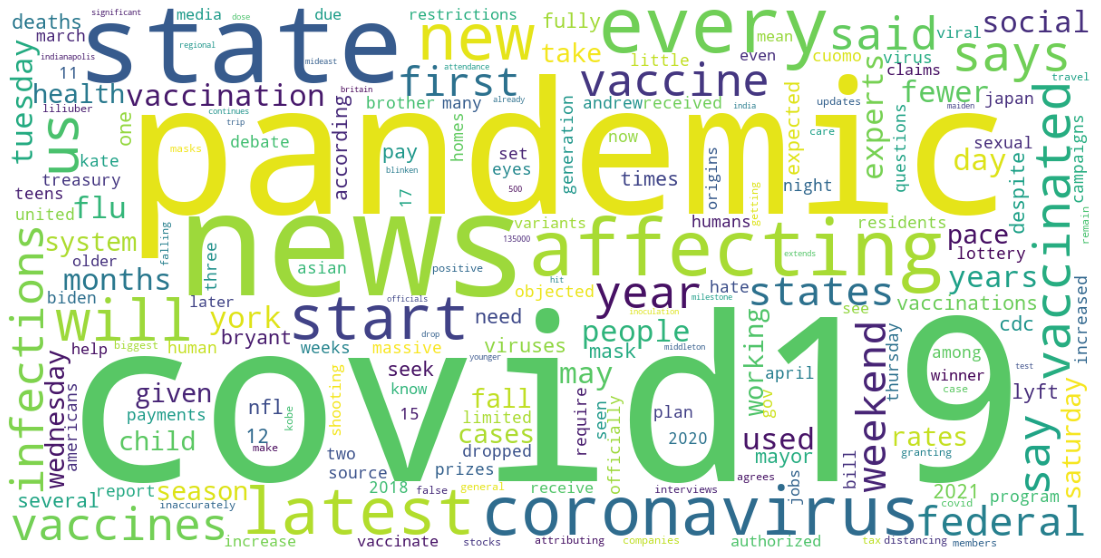

In [14]:
# 3 visualizing the analysisis in a Word Cloud
def visualize_data(wordcount):
    wc = WordCloud(width=1200,height=600, background_color='white').generate_from_frequencies(wordcount)
    plt.figure(figsize=(20,10))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

visualize_data(wordcount)

## Let's put everything in a function, so that we can run it easily for different sources

In [15]:
#import sys
#!"{sys.executable}" -m pip install newsapi-python
#!"{sys.executable}" -m pip install wordcloud

# integrating News API into your Python application 
from newsapi import NewsApiClient 
newsapi = NewsApiClient(api_key='345f8a0aa8c64d549fde1d8343d036f8')

# creating wordclouds into your Python application 
from wordcloud import WordCloud, STOPWORDS

# regular expression 
import re

import matplotlib.pyplot as plt

def make_world_cloud(query,sour,p_size):
    json_data = newsapi.get_everything(q=query,           # All the articles that contain this word
                                       language='en',
                                       sources=sour,      # The newspaper of interest
                                       page_size=p_size,  # Get 50 articles
                                       sort_by='relevancy'   
                                    )
    
    #Combine the articles in one data
    contents = combine_articles(json_data['articles'])
    
    # 1 cleaning data
    clean_content = clean_data(contents)

    # 2 computing word-frequency pairs
    wordcount = analyze_data(clean_content)
 
    # 3 visualizing the analysis in a Word Cloud
    visualize_data(wordcount)

Before cleaning
India is one of the largest suppliers of vaccines in the world, but it’s facing a shortfall of COVID-19 vaccines and severe coronavirus outbreaks. Patent waivers of vaccines might help — but it will take policies, infrastructure, and time to ramp up manufactu… Politico is reporting that Facebook will no longer treat posts saying that COVID-19 was man-made as misinformation, allowing them to stay on the site. The news comes as President Biden has ordered an investigation into the virus’s origin. New research shows that people who had COVID-19 and then were vaccinated should be protected against

After cleaning
['india', 'one', 'largest', 'suppliers', 'vaccines', 'world', 'it’s', 'facing', 'shortfall', 'covid19', 'vaccines', 'severe', 'coronavirus', 'outbreaks', 'patent', 'waivers', 'vaccines', 'might', 'help', '—', 'will', 'take', 'policies', 'infrastructure', 'time', 'ramp', 'manufactu…', 'politico', 'reporting', 'facebook', 'will', 'longer', 'treat', 'posts', 'saying',

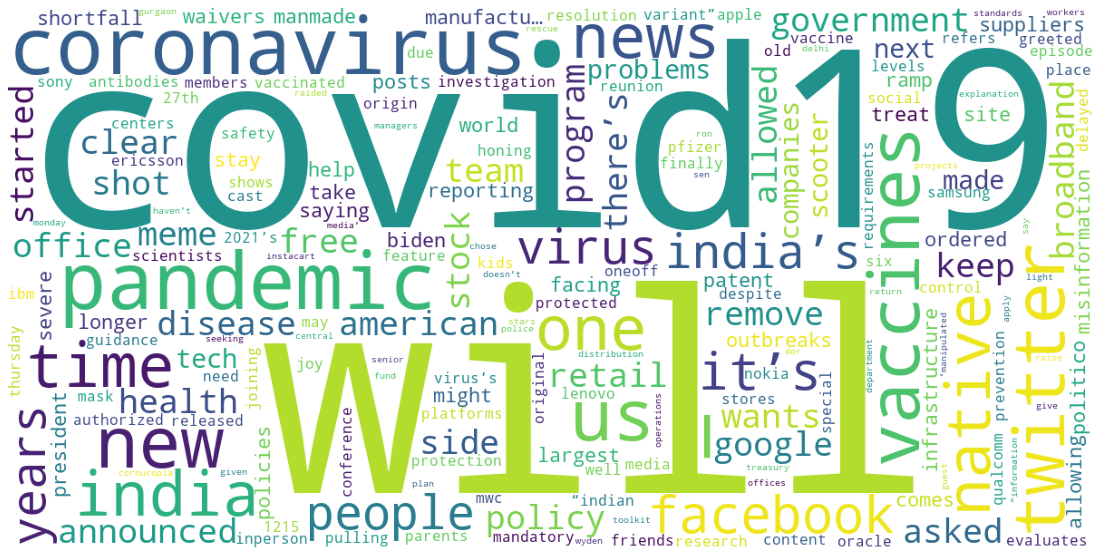

In [16]:
make_world_cloud('coronavirus','the-verge',100)

Before cleaning
The troubled office-sharing startup's business was hit particularly hard by the coronavirus pandemic. When millions turned up for the Hindu festival amid a coronavirus surge, many feared the worst. Fraudsters offer forged German vaccine certificates on the encrypted Telegram messenger service. The United States track and field team cancels its pre-Olympic training camp in Japan because of concerns about the coronavirus pandemic. Experts say Covid-19 has exposed the inadequacies of India's healthcare infrastructure. It is not clear where the bodies came from, but local media suggest they may be

After cleaning
['troubled', 'officesharing', 'startups', 'business', 'hit', 'particularly', 'hard', 'coronavirus', 'pandemic', 'millions', 'turned', 'hindu', 'festival', 'amid', 'coronavirus', 'surge', 'many', 'feared', 'worst', 'fraudsters', 'offer', 'forged', 'german', 'vaccine', 'certificates', 'encrypted', 'telegram', 'messenger', 'service', 'united', 'states', 'track', 'fiel

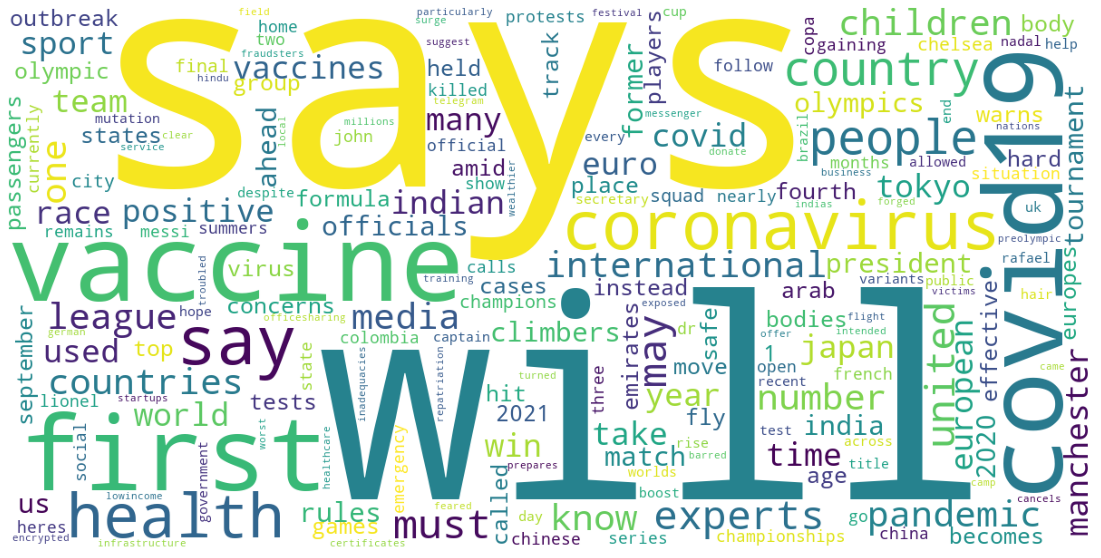

In [18]:
make_world_cloud('coronavirus','bbc-news',100)

Before cleaning
Fraudsters offer forged German vaccine certificates on the encrypted Telegram messenger service. The green light is a guideline for national regulators that a vaccine is safe and effective. The Russian president compares vaccine technology to the enduringly popular 1940s assault rifle. The country's health ministry says the vaccine is "safe and effective when used in this younger age group". The vaccine, currently in Phase 3 trials, is being developed by Indian firm Biological E. He also apologised for taking the Sinopharm vaccine, telling people not to "follow" his actions. Supporters say the

After cleaning
['fraudsters', 'offer', 'forged', 'german', 'vaccine', 'certificates', 'encrypted', 'telegram', 'messenger', 'service', 'green', 'light', 'guideline', 'national', 'regulators', 'vaccine', 'safe', 'effective', 'russian', 'president', 'compares', 'vaccine', 'technology', 'enduringly', 'popular', '1940s', 'assault', 'rifle', 'countrys', 'health', 'ministry', 'says', '

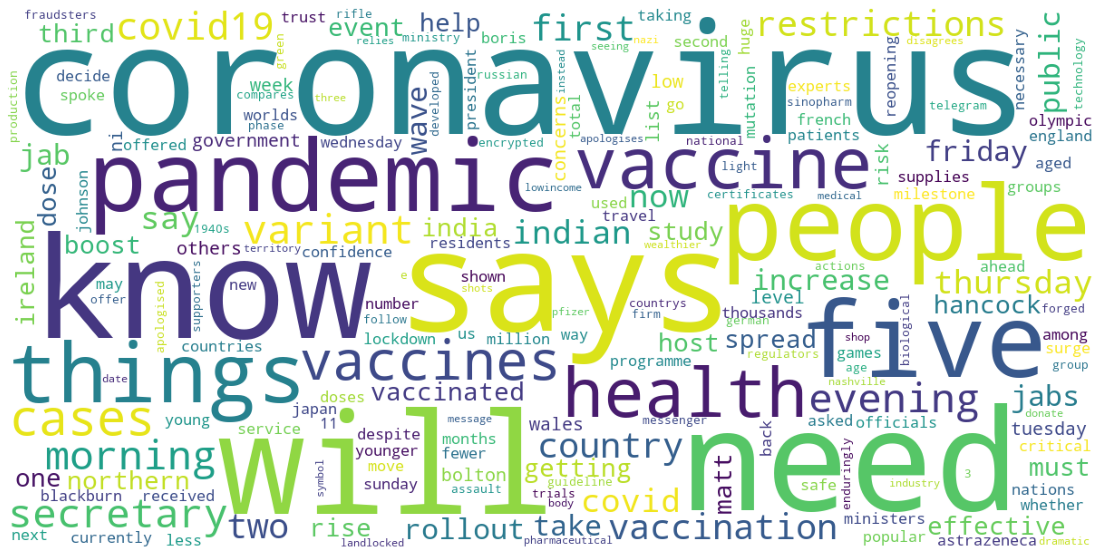

In [19]:
make_world_cloud('coronavirus vaccine','bbc-news',100)